In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np

YEAR = 2021
filePath = '/Users/Firefly/Desktop/_iMac_Drive/Joseph/Coding/NFL/Jupyter/'

data = nfl.import_pbp_data([YEAR])
team_desc = nfl.import_team_desc()

# These two lines set the scroll options so you can scroll vertically and horizontally.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)



2020 done.
Downcasting floats.


In [2]:
# Copy data to new df
df = data.copy()

df = df.filter(['week', 'desc', 'posteam', 'defteam', 'play_type', 'fumble_recovery_1_team', 'return_team', 'desc', 'epa', 'wpa', 'interception', 'fumble_lost'])

# Set maxWeek, 
maxWeek = df.week.max()

# Filter df
df = df.loc[(df.interception==1.0) | (df.fumble_lost==1.0)] #& (df.play_type.isin(['pass', 'rush', 'qb_spike', 'qb_kneel']))]

# Add calculated columns to account for epa/wpa on punts
# Punts show the punting team as the posteam, so epa/wpa shows as positive. 
# We want to reverse that so they're negative, and we need posteam to show as the receiving team

df['calc_posteam'] = np.where((df.play_type=='punt') & (df.fumble_recovery_1_team==df.posteam), df.defteam, df.posteam)
df['calc_epa'] = np.where((df.play_type=='punt') & (df.fumble_recovery_1_team==df.posteam), df.epa - (df.epa *2), df.epa)
df['calc_wpa'] = np.where((df.play_type=='punt') & (df.fumble_recovery_1_team==df.posteam), df.wpa - (df.wpa *2), df.wpa)

df1 = df.groupby('calc_posteam')[['calc_epa', 'calc_wpa']].sum()

# Filter team_desc to just the necessary columns
team_df = team_desc.filter(['team_abbr', 'team_logo_espn'])


# Merge df with team_df
dfm = pd.merge(df1, team_df, how = 'inner', left_on = 'calc_posteam', right_on = 'team_abbr')
dfm

,calc_epa,calc_wpa,team_abbr,team_logo_espn
0,-116.278252,-2.767789,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,-73.479561,-2.196742,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,-90.627228,-2.311615,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,-100.938698,-2.048691,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,-94.768669,-1.617528,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark/car.png
5,-106.384338,-2.311306,CHI,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png
6,-122.791985,-2.787917,CIN,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png
7,-84.607582,-1.401979,CLE,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png
8,-135.448059,-3.154698,DAL,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png
9,-149.871155,-3.059452,DEN,https://a.espncdn.com/i/teamlogos/nfl/500/den.png


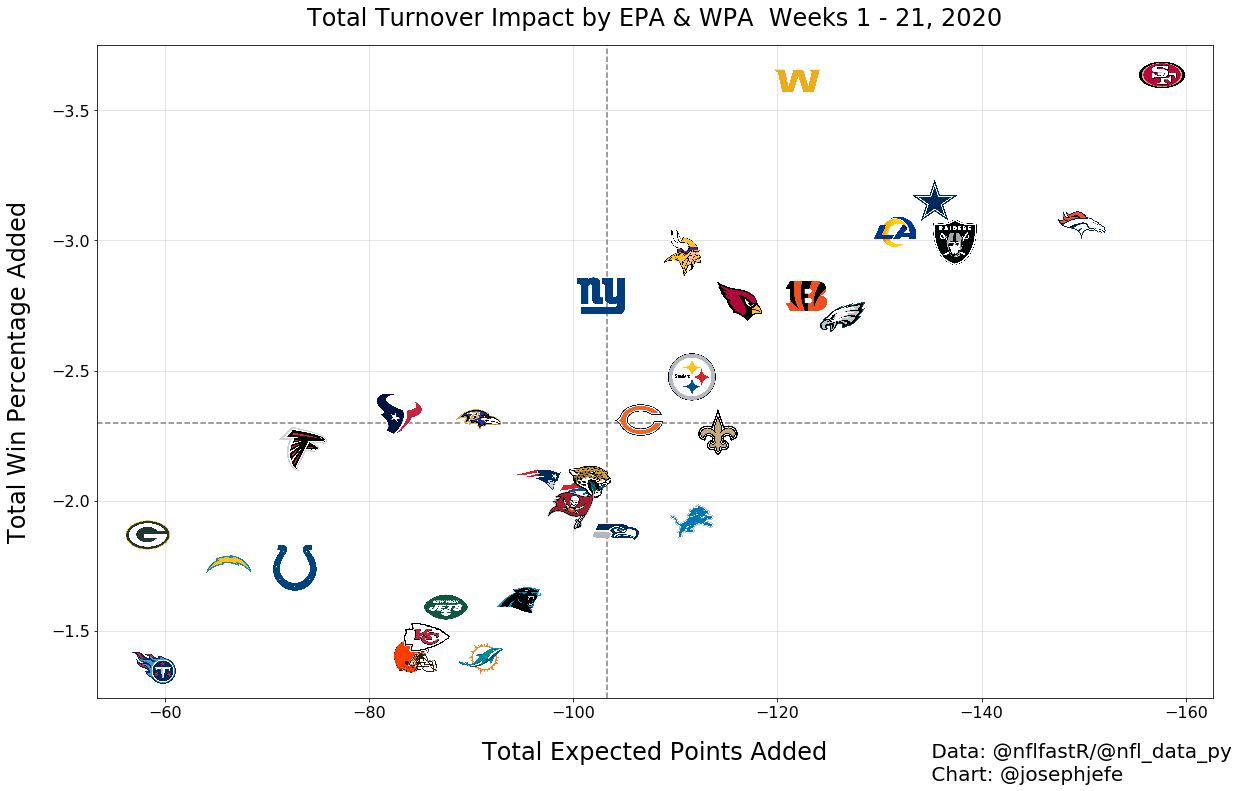

In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Create the figure
fig, ax = plt.subplots(figsize=(20,12))

# Set x, y, and logos 
x = dfm.calc_epa
y = dfm.calc_wpa
logos = dfm.team_logo_espn


#Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

# Invert both axes so that top right shows the worst turnovers
ax.invert_xaxis()
ax.invert_yaxis()

#Add logos
#X data is an array from 0-32 (for 32 teams)
for x0, y0, path in zip(x, y, logos):
   ab = AnnotationBbox(OffsetImage(plt.imread(path), zoom=.1), (x0, y0), frameon=False, fontsize=4)
   ax.add_artist(ab)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

# Set average epa and wpa variables
x_avg = x.mean()
y_avg = y.mean()

#set average epa line
ax.axvline(x=x_avg, linestyle='--', color='grey')

#set average wpa line
ax.axhline(y=y_avg, linestyle='--', color='grey')

# Set xtick and ytick font size
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

# Set title
title_text = 'Total Turnover Impact by EPA & WPA  Weeks 1 - '  + str(maxWeek) + ', 2020'

#Set labels and give source
ax.set_xlabel('Total Expected Points Added',fontsize=24,labelpad=20)
ax.set_ylabel('Total Win Percentage Added',fontsize=24,labelpad=20)
ax.set_title(str(title_text), fontsize=24,pad=20)

plt.figtext(.7,.03,' Data: @nflfastR/@nfl_data_py \n Chart: @josephjefe' ,fontsize=20)

#Save the figure as a png
plt.savefig(filePath + 'Figures/' + str(title_text) + '.png', dpi=400)
plt.show()
